
# Patient's Treatment data

In [590]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [591]:
# Reading the Data

df= pd.read_csv("data_treatment.csv")
df.head(1)

,age,sex,visit_motivation,physiological_context,admission_reason,diagnosis_test,diagnosis_result,diagnosis_condition,related_condition,reason_for_treatment,treatment_name
0,52,female,Generalized grade three pruritus of six months duration,"Hypertensive detected one year ago, prescribed Amlodipine",NaN,Ultrasound scan,"Multiple noncommunicating cysts of varying size in both lobes of liver, mild dilation of intrahepatic biliary radicles, normal common hepatic duct and common bile duct, bulky kidneys with multiple noncommunicating cysts",NaN,Hypertension,To manage hypertension,Amlodipine


# EDA

In [593]:
# making all the data labels lower
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df.head(2)

#remove duplicates
print(f"shape of dataframe: {df.shape}")
df.drop_duplicates(inplace=True)
print(f"shape of dataframe after ddup: {df.shape}")

shape of dataframe: (17029, 11)
shape of dataframe after ddup: (17021, 11)


C:\Users\ayush\AppData\Local\Temp\ipykernel_11016\820970960.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [594]:
# DATA OVERVIEW

#Shape
print(f"---------Shape of the dataframe--------\n {df.shape}")

# datatypes of all columns
print("\n--------Datatypes of all columns----------- ")
print(df.dtypes)

# null values
print("\n--------Null values in dataframe:----------- ")
print(df.isna().sum())

---------Shape of the dataframe--------
 (17021, 11)

--------Datatypes of all columns----------- 
age                      object
sex                      object
visit_motivation         object
physiological_context    object
admission_reason         object
diagnosis_test           object
diagnosis_result         object
diagnosis_condition      object
related_condition        object
reason_for_treatment     object
treatment_name           object
dtype: object

--------Null values in dataframe:----------- 
age                         9
sex                       104
visit_motivation          338
physiological_context    2826
admission_reason         2488
diagnosis_test            701
diagnosis_result         1412
diagnosis_condition      6383
related_condition         678
reason_for_treatment     1192
treatment_name              0
dtype: int64


In [595]:
# DATA OVERVIEW - removing null values
df= df.drop(columns=['diagnosis_condition'])
df.dropna(inplace=True)
df.reset_index(drop= True, inplace=True)

print("\n--------null values of dataframe after removing null values :----------- ")
print(df.isna().sum())


#Shape
print(f"\n---------shape of the dataframe--------\n {df.shape}")


--------null values of dataframe after removing null values :----------- 
age                      0
sex                      0
visit_motivation         0
physiological_context    0
admission_reason         0
diagnosis_test           0
diagnosis_result         0
related_condition        0
reason_for_treatment     0
treatment_name           0
dtype: int64

---------shape of the dataframe--------
 (10093, 10)


In [596]:
# Printing 2 full records
# Shuffle the DataFrame
df = df.sample(frac=1, random_state=52).reset_index(drop=True)
pd.set_option('display.max_colwidth', None)
df.head(2)

,age,sex,visit_motivation,physiological_context,admission_reason,diagnosis_test,diagnosis_result,related_condition,reason_for_treatment,treatment_name
0,one year,female,fever and severe respiratory distress,"dysmorphic features at birth, trisomy 21, normal cardiac echocardiogram, normal routine thyroid screens, no initial respiratory problems, history of feeding difficulty, recurrent vomiting, aspiration pneumonia, presumed gastroesophageal reflux, global developmental delay, severe failure to thrive",multiple hospital admissions for vomiting and documented aspiration pneumonia,cardiac echocardiogram,normal,aspiration pneumonia,treatment for aspiration pneumonia,symptomatic treatment
1,35,male,"evaluation of transient diplopia, expressive aphasia, daily right temporal headaches, and right facial and left leg weakness.","history of hyperlipidemia and seizure disorder, newly diagnosed atrial fibrillation, left atrial thrombus.",breakthrough seizure and incidental finding of acute cerebral infarcts in multiple vascular territories.,mri of the spine with contrast,"possible meningeal enhancement; punctate areas of encephalomalacia in the c3-4, c7, and t3 spinal levels.","atrial fibrillation, left atrial thrombus",to manage atrial fibrillation and left atrial thrombus,apixaban


In [597]:
pd.set_option('display.max_columns', None)

---------Value count of Sex column-----------
 sex
male                 5110
female               3710
woman                 997
man                   156
boy                    59
girl                   52
gentleman               6
male (geminus a)        2
sex not specified       1
Name: count, dtype: int64

 sex
Male      5334
Female    4759
Name: count, dtype: int64


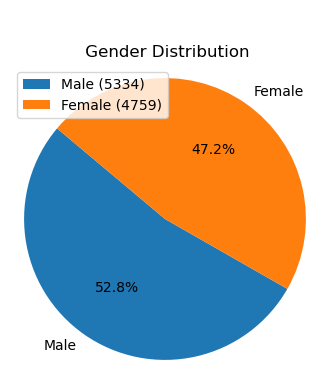

In [598]:
# EDA - sex distriibution

#print the count of gender
print("---------Value count of Sex column-----------\n",df['sex'].value_counts())


# Define a mapping to the three categories
mapping = {
    'male': 'Male',
    'man': 'Male',
    'gentleman': 'Male',
    'male (geminus a)': 'Male',
    'female': 'Female',
    'woman': 'Female',
    'girl': 'Female',
    'boy': 'Male',
    'sex not specified': 'Male'
}

# Apply the mapping
df['sex'] = df['sex'].map(mapping)
print("\n",df['sex'].value_counts())

# Count the occurrences of each sex
sex_counts = df['sex'].value_counts()
# Define the labels with counts for the legend
labels = [f'{category} ({count})' for category, count in zip(sex_counts.index, sex_counts)]

#Distribution of gender - pie chart
# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('\n \n Gender Distribution')
plt.legend(labels, loc="upper left")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [599]:
# EDA-  Age distribution
df['age'].unique()

array(['one year', '35', '74', '64', '85', '10 years old', '72', '44',
       '56 years old', '4 years old', '83', '51', '62', '16', '46', '56',
       '53', '58', '26', '57', '67', '40', '19', '37', '50 years old',
       '54', '45', '10-year-old', '61', '55 years old', '79', '27', '20',
       '32', '48', '17', '63', '8 years old', '68 years old', '39',
       '36 years old', '24', '29', '82', '65', '59', '70 years old', '68',
       '36', '41', '71', '25', '78', '21', '75', '47', '69', '38',
       '8-month old', '55', '28', '60 years old', '66', '31', '32 months',
       '58 years', '4.5 years old', '26 years old', '71 y/o', '77', '33',
       '33 years old', '24 years old', '9-year-old', '18', '52',
       '76-year-old', '73', '12', '34', '28 days old', '70-year-old',
       '70', '43', '52 years old', '49', '86', '7 years', '15',
       '5 years old', '3-year-old', '79 years old', '60', '48 years old',
       '55-years-old', '38 years', '13', '50', 'fifty-year-old',
       'in hi

In [600]:
# EDA-  Age distribution

# Function to extract and standardize age values
import regex as re

def extract_age(age):
    if pd.isna(age):
        return None
    match = re.search(r'\d+', str(age))
    if match:
        return int(match.group())
    return None

# Apply the extraction function
df['age'] = df['age'].apply(extract_age)

df['age'].unique()

array([nan, 35., 74., 64., 85., 10., 72., 44., 56.,  4., 83., 51., 62.,
       16., 46., 53., 58., 26., 57., 67., 40., 19., 37., 50., 54., 45.,
       61., 55., 79., 27., 20., 32., 48., 17., 63.,  8., 68., 39., 36.,
       24., 29., 82., 65., 59., 70., 41., 71., 25., 78., 21., 75., 47.,
       69., 38., 28., 60., 66., 31., 77., 33.,  9., 18., 52., 76., 73.,
       12., 34., 43., 49., 86.,  7., 15.,  5.,  3., 13., 30.,  6., 22.,
       42., 14., 23., 81.,  1., 80., 95., 90., 92., 11., 87., 84., 89.,
       88.,  2., 93., 94.])

In [601]:
# EDA-  Age distribution

# imputing null value
print("Null values before imputing", df['age'].isna().sum())
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)
print("Null values after imputing with median ",df['age'].isna().sum())
df['age'] = df['age'].astype(int)
df['age'].unique()

Null values before imputing 182
Null values after imputing with median  0


array([52, 35, 74, 64, 85, 10, 72, 44, 56,  4, 83, 51, 62, 16, 46, 53, 58,
       26, 57, 67, 40, 19, 37, 50, 54, 45, 61, 55, 79, 27, 20, 32, 48, 17,
       63,  8, 68, 39, 36, 24, 29, 82, 65, 59, 70, 41, 71, 25, 78, 21, 75,
       47, 69, 38, 28, 60, 66, 31, 77, 33,  9, 18, 76, 73, 12, 34, 43, 49,
       86,  7, 15,  5,  3, 13, 30,  6, 22, 42, 14, 23, 81,  1, 80, 95, 90,
       92, 11, 87, 84, 89, 88,  2, 93, 94])

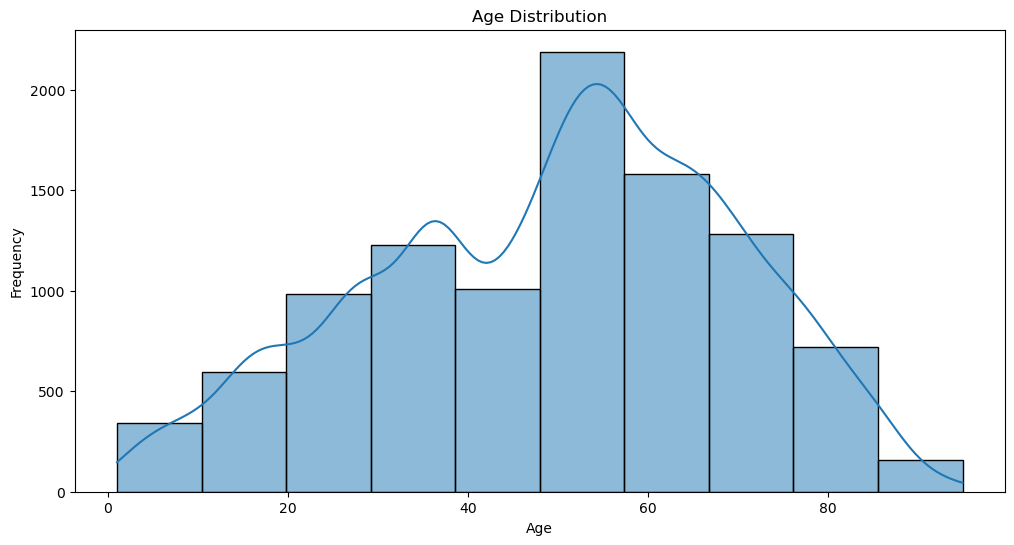

In [602]:
# EDA-  Age distribution

#plotting histogram 
ages= df['age'].dropna()
plt.figure(figsize=(12, 6))
sns.histplot(ages, bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Set the x-axis ticks
# bin_edges = np.histogram_bin_edges(ages, bins=10)
# plt.xticks(np.arange(int(bin_edges.min()), int(bin_edges.max()) + 1))
# plt.xticks(bin_edges)
plt.show()



 -----------------related condition:-------------
 2514
related_condition
anemia                                                    87
hypertension                                              83
suspected infection                                       77
lyme disease                                              61
coronary artery disease                                   55
                                                          ..
gross hematuria                                            1
microvascular angina                                       1
possible meniere’s disease                                 1
haematemesis                                               1
superficial wound infection at the umbilical port site     1
Name: count, Length: 2514, dtype: int64


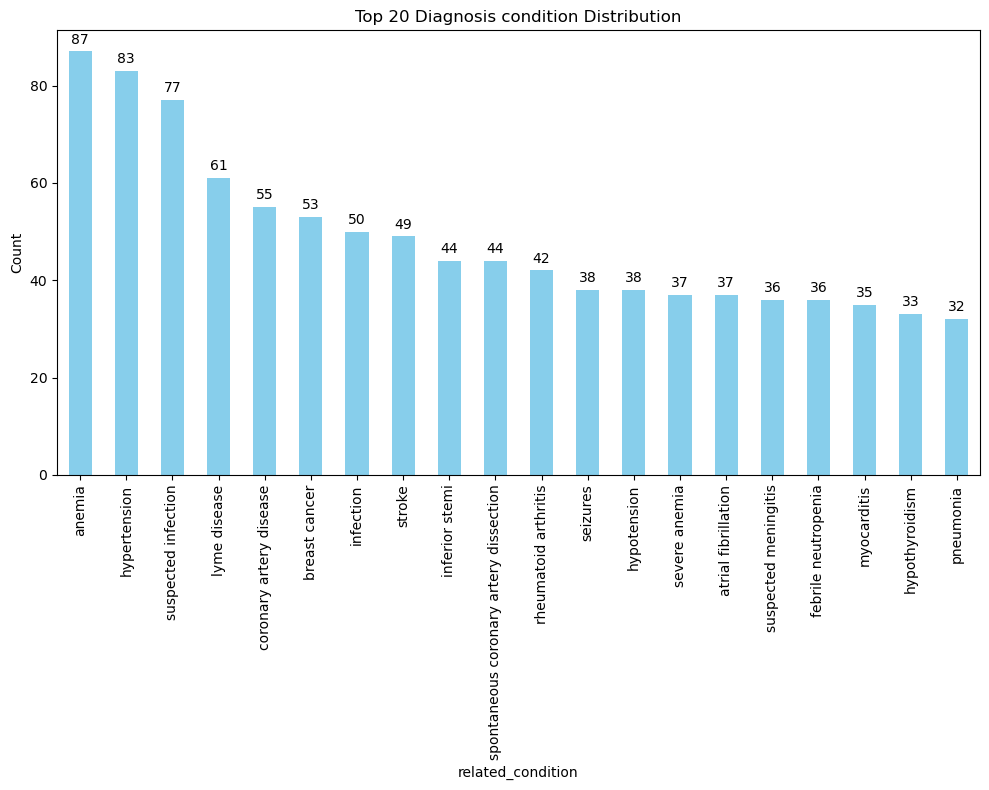

In [603]:
# EDA- Top 20 related condition

print(f"\n -----------------related condition:-------------\n {df['related_condition'].nunique()}")
print(df["related_condition"].value_counts())


#Bar graph distribution

# Count the occurrences of each treatment
related_condition_counts = df['related_condition'].value_counts()
# Select the top 15 treatments
top_15_related_condition = related_condition_counts .head(20)


# Plot the bar chart for the top 15 treatments
plt.figure(figsize=(10, 8))
top_15_related_condition.plot(kind='bar', color='skyblue')
plt.title('Top 20 Diagnosis condition Distribution')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Annotate each bar with its count
for index, value in enumerate(top_15_related_condition):
    # plt.text(index, value +10, str(value), ha='center', va='bottom')
    plt.text(index, value+1, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


 -----------------Unique treatments:-------------
 100
treatment_name
antibiotics                614
chemotherapy               474
aspirin                    375
blood transfusion          309
conservative management    296
                          ... 
nivolumab                   27
losartan                    26
oral steroids               21
omeprazole                  20
risperidone                 12
Name: count, Length: 100, dtype: int64


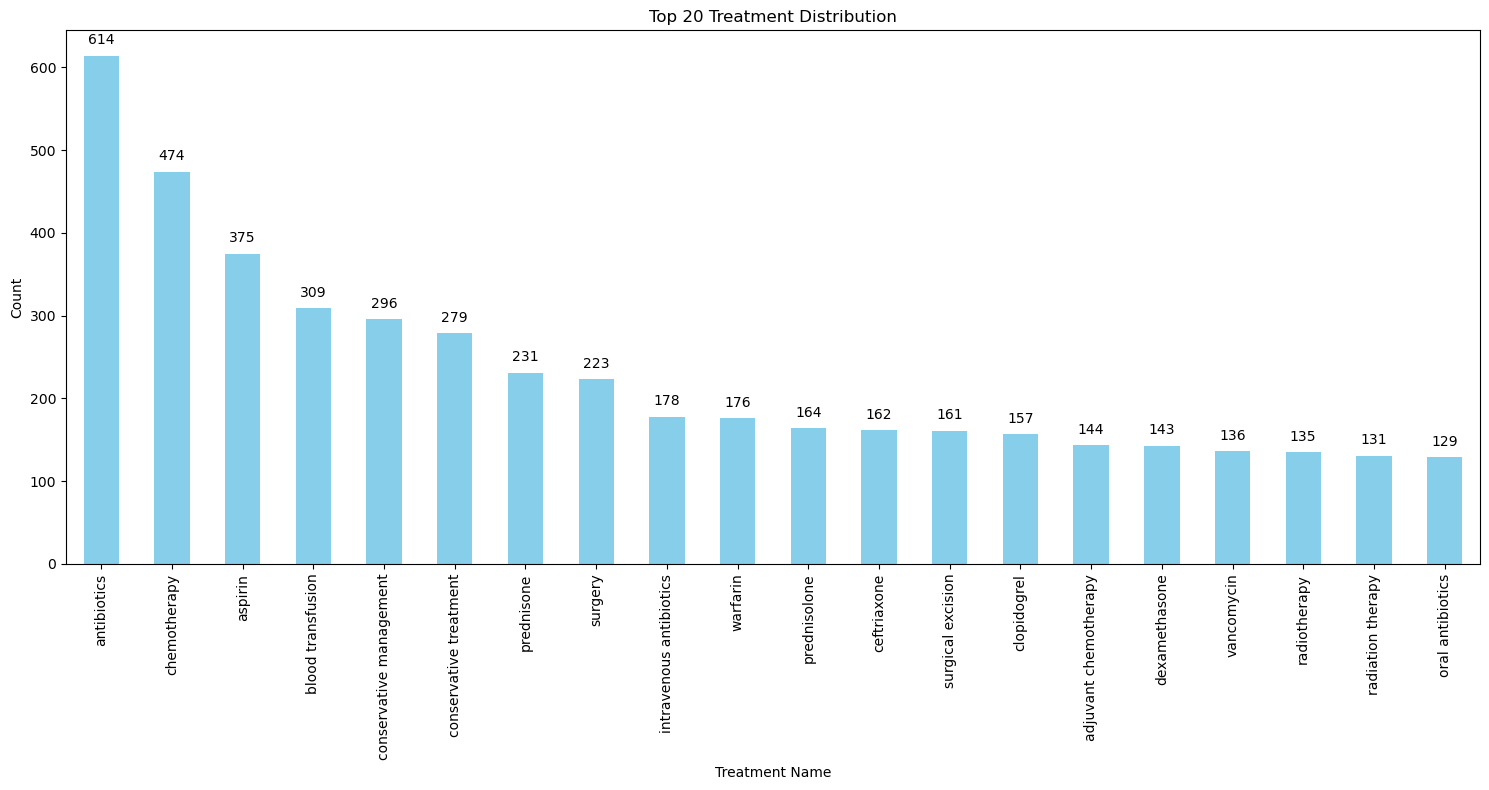

In [604]:
# EDA - top 20 treatment classes

# unique values in diagnosis (label colum)
df['treatment_name'] = df['treatment_name'].str.lower()
print(f"\n -----------------Unique treatments:-------------\n {df['treatment_name'].nunique()}")
print(df["treatment_name"].value_counts())

#Bar graph distribution

# Count the occurrences of each treatment
treatment_counts = df['treatment_name'].value_counts()
# Select the top 15 treatments
top_15_treatments = treatment_counts.head(20)


# Plot the bar chart for the top 15 treatments
plt.figure(figsize=(15, 8))
top_15_treatments.plot(kind='bar', color='skyblue')
plt.title('Top 20 Treatment Distribution')
plt.xlabel('Treatment Name')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Annotate each bar with its count
for index, value in enumerate(top_15_treatments):
    plt.text(index, value + 10, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [605]:
df["visit_motivation"] 

0                                                                                                fever and severe respiratory distress
1        evaluation of transient diplopia, expressive aphasia, daily right temporal headaches, and right facial and left leg weakness.
2                                                                                                  melena and a hemoglobin of 5.8 g/dl
3                                                                                                       symptomatic drug refractory af
4                                                                                         symptoms of progressive dyspnoea and malaise
                                                                     ...                                                              
10088                                                                                   recurrent fever and painful ulcers on her legs
10089                                                  

In [606]:
# EDA - LDA on visit motivation

# Step 1: Tokenize and preprocess the text
# Example function to preprocess text (you can customize this based on your needs)
def preprocess_text(text):
    tokens = text.lower().split()  # Split text into tokens
    tokens = [token for token in tokens if token not in ENGLISH_STOP_WORDS]  # Remove stopwords
    return tokens
    
# Apply preprocessing to your 'visit_motivation' column
processed_docs = df['visit_motivation'].apply(preprocess_text)

# Step 2: Create Document-Term Matrix using CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
doc_term_matrix = vectorizer.fit_transform(processed_docs)

# Step 3: Train LDA model
num_topics = 10  # You can adjust this number based on your specific needs
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(doc_term_matrix)

# Print topics and their top words
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx + 1}: "
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

n_top_words = 10  # Number of top words to display per topic
print("\n Visit MotivatiTopics in LDA model:")
print_top_words(lda, vectorizer.get_feature_names_out(), n_top_words)

C:\Users\ayush\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



 Visit MotivatiTopics in LDA model:
Topic #1: pain cough fever, abdominal intermittent dyspnea nausea, vomiting chills, fever
Topic #2: left numbness limb transient complications follow-up treatment blood transplantation kidney
Topic #3: weakness progressive right loss pain, chest consciousness right-sided visual weight
Topic #4: right pain fall left flank lower mass limb complaints chest
Topic #5: pain swelling left right headache painful complaints left-sided upper multiple
Topic #6: weight loss episodes worsening lower weakness bilateral months significant syncope
Topic #7: pain abdominal onset sudden acute lower right left severe upper
Topic #8: shortness breath chest left pain mass worsening bleeding progressive breath,
Topic #9: injury routine acute seizure home episode generalized progressively evaluation follow-up
Topic #10: evaluation right management fever respiratory left recurrent facial severe discomfort


In [607]:
# EDA - LDA on diagnosis_test

# Step 1: Tokenize and preprocess the text
# Example function to preprocess text (you can customize this based on your needs)
def preprocess_text(text):
    tokens = text.lower().split()  # Split text into tokens
    tokens = [token for token in tokens if token not in ENGLISH_STOP_WORDS]  # Remove stopwords
    return tokens
    
# Apply preprocessing to your 'visit_motivation' column
processed_docs = df['diagnosis_test'].apply(preprocess_text)

# Step 2: Create Document-Term Matrix using CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
doc_term_matrix = vectorizer.fit_transform(processed_docs)

# Step 3: Train LDA model
num_topics = 5  # You can adjust this number based on your specific needs
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(doc_term_matrix)

# Print topics and their top words
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx + 1}: "
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

n_top_words = 10  # Number of top words to display per topic
print("\nDiagnosis Tests Topics in LDA model:")
print_top_words(lda, vectorizer.get_feature_names_out(), n_top_words)


Diagnosis Tests Topics in LDA model:
Topic #1: ct scan mri chest abdomen brain contrast head x-ray pelvis
Topic #2: imaging ultrasound resonance magnetic angiography (mri) investigations echocardiogram radiographs echocardiography
Topic #3: blood cultures urine serum level test count tests levels troponin
Topic #4: tomography computed (ct) examination abdominal scan laboratory tests histopathological pathology
Topic #5: biopsy laboratory analysis coronary liver angiography function renal fluid aspiration
